# Simple Linear Regression

Linear regression is used for finding linear relationship between target and one or more predictors..

Simple Linear Regression is useful for finding relationship between two continuous variable.one is predictor and other is dependant variable..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the csv file

ds = pd.read_csv("tvmarketing.csv")
ds.head(4)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5


In [3]:
#lets chechk the dataset info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [4]:
#lets check some statiscal information about the dataframe
ds.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# visualising Data using Seaborn lib

In [5]:
import seaborn as sns
%matplotlib inline

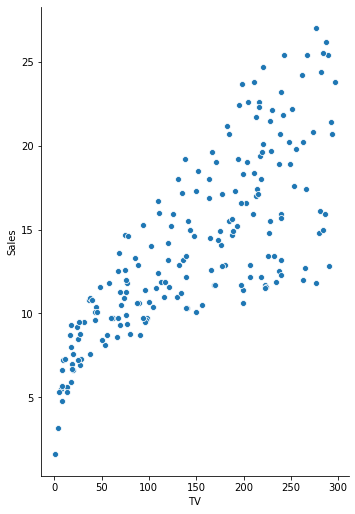

In [8]:
sns.pairplot(ds,x_vars= ["TV"],y_vars = "Sales",size = 7,aspect = 0.7,kind = 'scatter');

# Performing Simple Linear Regression

Equation linear regression :
y = c +m1x1+m2x2+.....+mnxn

In this case : y = c +m1 * TV

In [9]:
X = ds["TV"]
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [10]:
y = ds["Sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Spliting data into training and testing set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 32)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [17]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140,)
(60,)


# Performing Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Coefficient Calculation 

In [20]:
print(lr.intercept_)
print(lr.coef_)

7.065240630902417
[0.05013171]


In [22]:
y_pred = lr.predict(X_test)

# Computing RMSE and R^2 values

Text(0, 0.5, 'Sales')

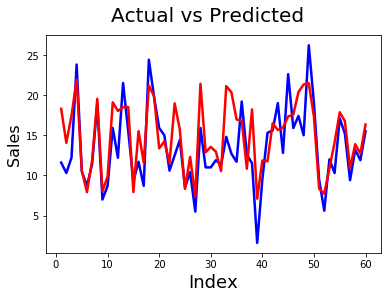

In [24]:
# Actual vs predicted

c = [i for i in range(1,61,1)]  #generating index

fig = plt.figure()
plt.plot(c,y_test,color = "blue",linewidth = 2.5,linestyle = "-")
plt.plot(c,y_pred,color = "red",linewidth = 2.5,linestyle = "-")
fig.suptitle("Actual vs Predicted",fontsize = 20)
plt.xlabel("Index",fontsize = 18)
plt.ylabel("Sales",fontsize = 16)


Text(0, 0.5, 'ytest-ypred')

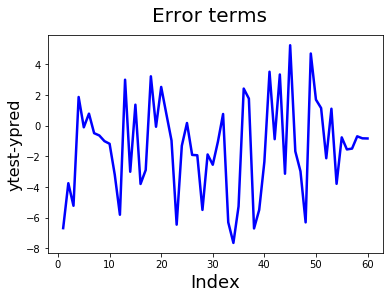

In [25]:
#Error terms
c = [i for i in range(1,61,1)]

fig = plt.figure()
plt.plot(c,y_test-y_pred,color = "blue",linewidth = 2.5,linestyle = "-")
fig.suptitle("Error terms",fontsize = 20)
plt.xlabel("Index",fontsize = 18)
plt.ylabel("ytest-ypred",fontsize = 16)

In [26]:
from sklearn.metrics import mean_squared_error,r2_score

In [27]:
mse = mean_squared_error(y_test,y_pred)
r_square = r2_score(y_test,y_pred)

In [28]:
print("Mean Squared error",mse)
print("R_square_value",r_square)

Mean Squared error 11.255102587515921
R_square_value 0.4958482412886632


Text(0, 0.5, 'predicted Y')

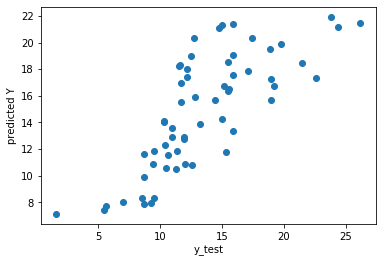

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("predicted Y")